In [1]:
# Upgrading tensorflow
!pip install tensorflow -U

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [2]:
print(f'Tensorflow Version: {__import__("tensorflow").__version__}')

Tensorflow Version: 2.1.0


In [0]:
# Loading the dataset
from sklearn.datasets import load_iris
iris_data = load_iris()
X = iris_data['data']
y = iris_data['target']
y_labels = iris_data['target_names']

In [0]:
# Splitting the dataset into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Importing required classes for model creation
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [0]:
# Defining the model architecture
model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(4,)))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [8]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


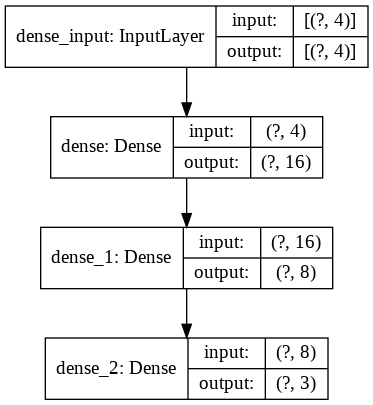

In [9]:
# Visualizing the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [0]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Fitting the model to the training dataset
model.fit(X_train, y_train,
          batch_size=32, epochs=150,
          verbose=0)

In [12]:
# Evaluating the model
loss, acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {acc}')

30/30 [==============================] - 0s 3ms/sample - loss: 0.1013 - accuracy: 1.0000
Accuracy: 1.0


In [13]:
# Predicting from the test dataset
from numpy import argmax
y_pred = model.predict(X_test)
y_pred = argmax(y_pred, axis=1)
print(y_pred)
# Converting encoded values to labels
y_pred = y_labels[y_pred]
print(y_pred)

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]
['versicolor' 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa'
 'setosa' 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica']
